<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch7. 5

pg. 441-451

# [Chapter 7] 군집화

## 7-5. DBSCAN

### DBSCAN 개요

**DBSCAN**(Density Based Spatial Clustering of Applications with Noise)
- *밀도 기반 군집화*의 대표적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포를 가진 데이터 세트도 군집화 잘 수행
- 핵심 포인트를 연결하면서 군집화 구성

**주요 파라미터**
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수




**데이터 포인트**

: 입실론 주변 영역 내에 포함되는 **최소 데이터 개수 충족 여부**에 따라 정의
- 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 **이상**의 타 데이터를 가지고 있는 경우
- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터
- 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 X, 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 X, 핵심 포인트를 이웃 포인트로 가지고 있지 않은 데이터

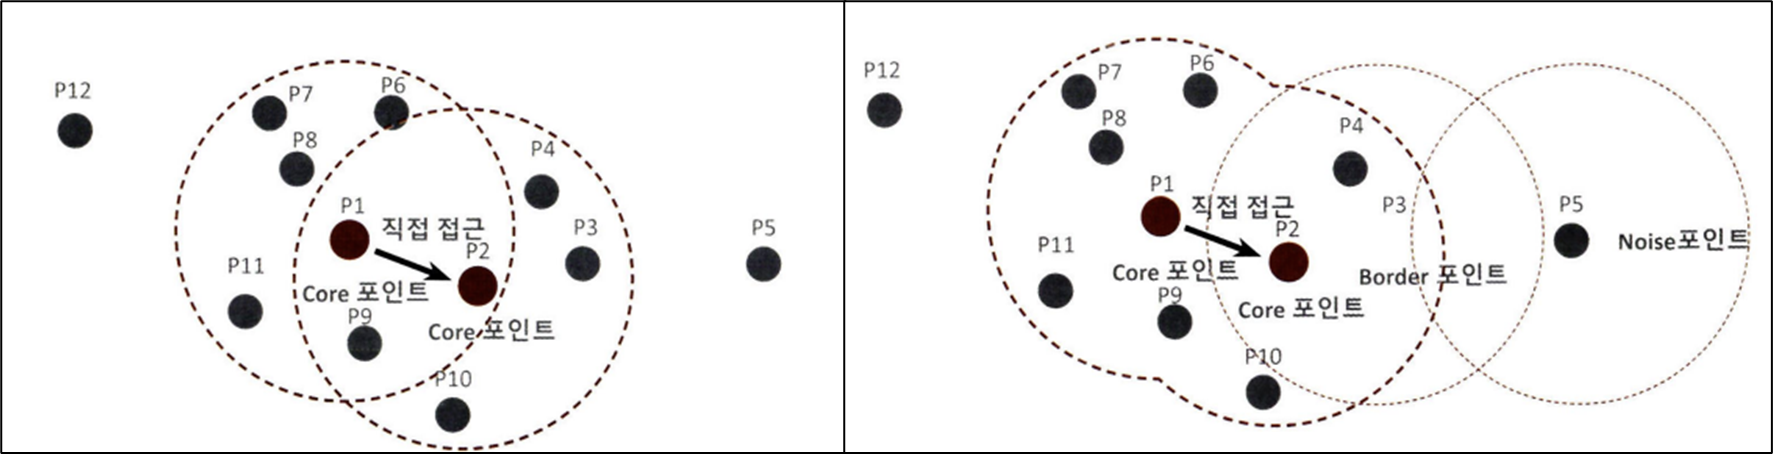

최소 데이터 세트 6개로 설정
- P1, P2 : 핵심 포인트
  - 입실론 반경 내에 포함된 데이터가 각각 7개, 6개
  - 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 -> 직접 접근 가능
  - 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집 영역 확장
- P3 : 경계 포인트
  - 반경 내에 포함되는 이웃 데이터가 2개 -> 핵심 포인트 X
  - 이웃 데이터 중 핵심 포인트인 P2 존재 -> 경계 포인트
  - 경계 포인트는 군집의 외곽 형성
- P5 : 잡음 포인트
  - 반경 내에 최소 데이터 개수 X, 핵심 포인트를 이웃 데이터로 가지고 있지 않음

사이킷런 - **DBSCAN 클래스**
- eps : 입실론 주변 영역의 반경을 의미
- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미(min points +1)

### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- eps=0.6, min_samples=8
- 일반적으로 eps 값으로 1 이하의 값을 설정

- 군집 레이블이 -1 : 노이즈에 속하는 군집을 의미
- target 값의 유형이 3가지인데 군집이 2개라고 군집화 효율이 떨어지는 것이 아님
- DBSCAN은 군집의 개수를 자동으로 지정

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

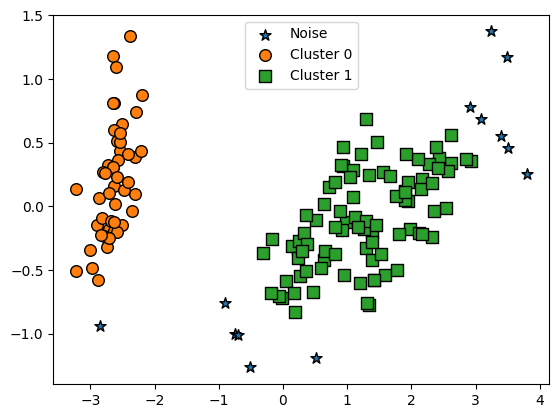

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별표로 표현된 값은 모두 노이즈
- PCA를 이용해 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러남


- eps ↑ : 반경이 커져 포함하는 데이터가 많아지므로 노이즈 개수 ↓
- min_samples ↑ : 주어진 반경 내에 더 많은 데이터를 포함시켜야 하므로 노이즈 개수 ↑
  - 데이터 밀도가 커져야 하는데 매우 촘촘한 데이터 분포가 아닐 경우 노이즈로 인식하기 때문

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


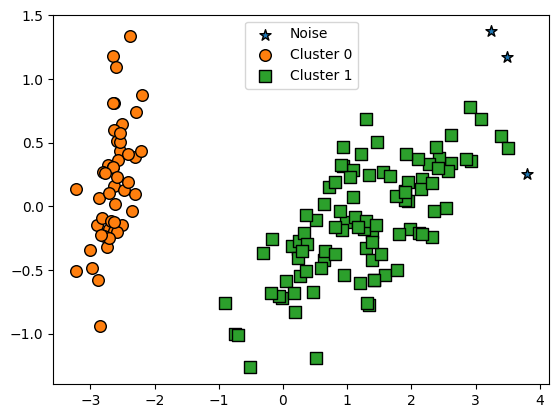

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- eps 0.6에서 0.8로 증가 -> 노이즈 데이터 개수 감소
  - eps 반경이 커지면서 노이즈로 분류된 데이터 세트가 Cluster 1에 소속됨
- 노이즈 군집인 -1이 3개밖에 없음


In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


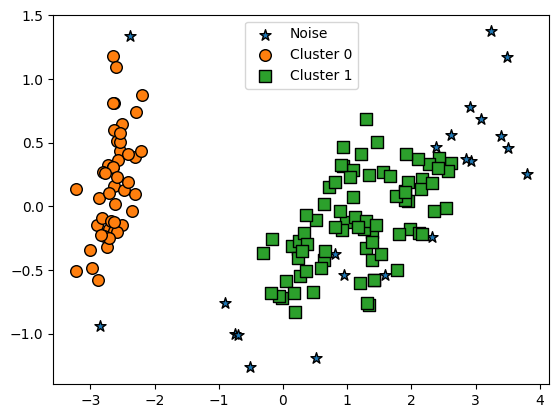

In [ ]:
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- eps 0.6으로 유지, min_samples 16으로 증가 - > 노이즈 데이터가 기존보다 많이 증가

### DBSCAN 적용하기 - make_circles() 데이터 세트

- make_circles() : 오직 2개의 피처만을 생성
- 파라미터
  - noise : 노이즈 데이터 세트의 비율
  - factor : 외부 원과 내부 원의 scale 비율

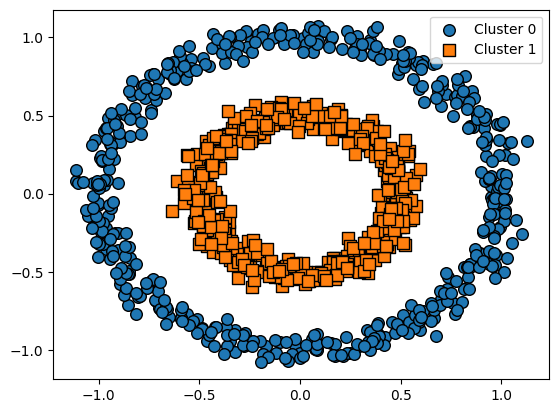

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


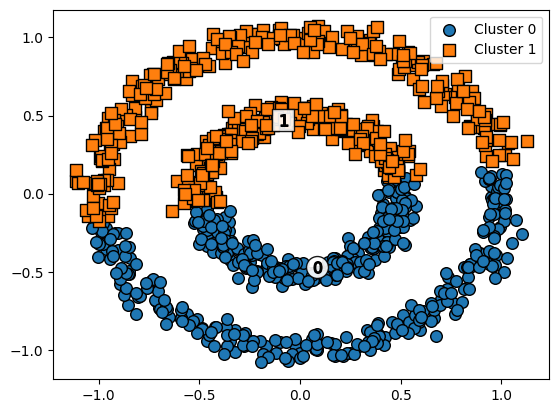

In [ ]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- KMeans 군집화 수행 결과
  - 위와 아래 절반으로 군집화됨
  - 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

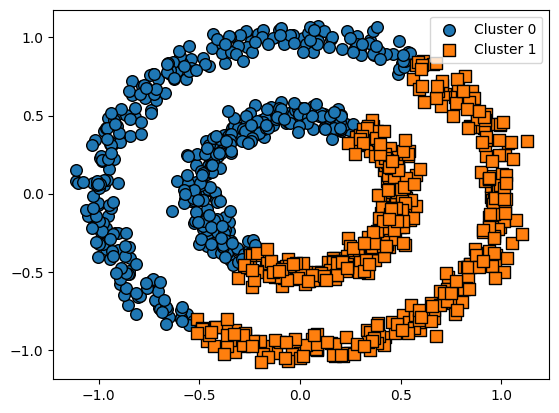

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- GMM 군집화 수행 결과
  - 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화
  - 원형으로 구성된 복잡한 형태의 데이터 세트에서 원하는 방향으로 군집화되지 않음

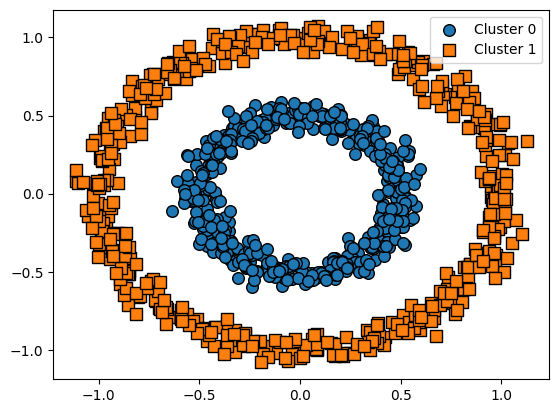

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- DBSCAN 군집화 수행 결과
  - 원하는 방향으로 정확히 군집화됨